### Globals

In [23]:
library(magrittr)  # nice piping operators
library(tidyverse)  # tables, plotting, read-write
library(Cairo)  # for pdf unicode export
library(rasilabRtemplates)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#000000", "#E69F00", "#56B4E9", 
            "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

### Figure 2A

In [24]:
data <- read_tsv('../data/plate_reader/2a_data.tsv')
sampleannotations <- read_csv('../data/plate_reader/2a_ann.csv')

processed_data <- data %>%  
  left_join(sampleannotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate, expt_medium)) %>%
  mutate(od = od - 0.04)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype_serA = col_character(),
  genotype = col_character(),
  expt_medium = col_character(),
  serine_mM = col_integer(),
  glucose = col_double(),
  replicate = col_integer(),
  plate = col_integer()
)


Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

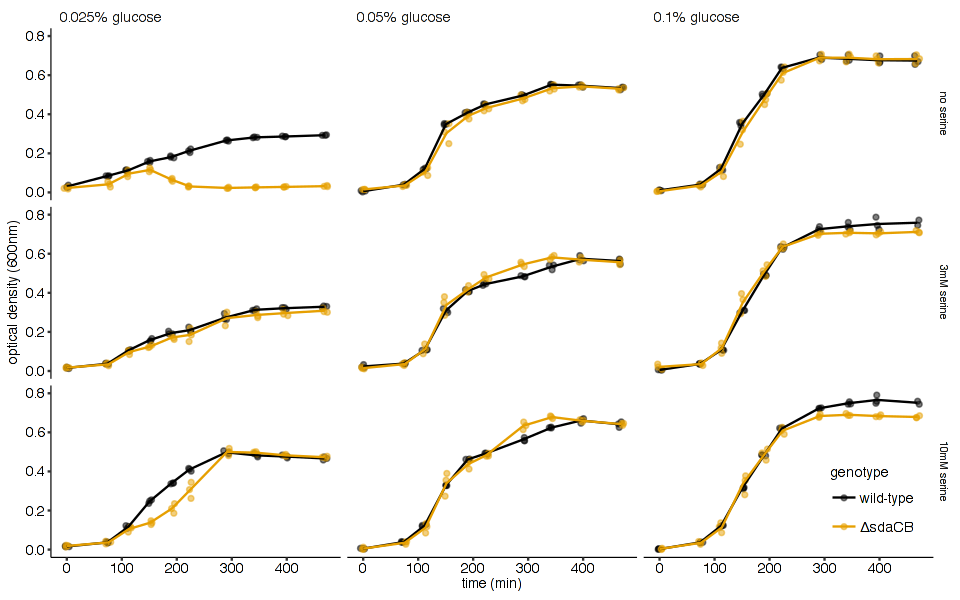

In [25]:
# plot all glucose/serine combinations

plot_data <- processed_data %>%
  subset(genotype_serA == 'WT') %>%
  mutate(genotype = factor(genotype, levels=c('WT','sdaCB'))) %>%
  mutate(serine_mM = factor(serine_mM, labels=c('no serine', '3mM serine', '10mM serine'))) %>%
  mutate(glucose = factor(glucose, labels=c('0.025% glucose', '0.05% glucose', '0.1% glucose')))

plot.width = 8
plot.height = 5
options(repr.plot.width=plot.width, repr.plot.height=plot.height)

ggplot(plot_data, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
facet_grid(serine_mM~glucose) +
scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("ΔsdaCB")))) +
scale_y_continuous(limits = c(0, 0.8)) +
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05), legend.position = c(0.93, 0.1)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../png/fig_2a_grid.png', dpi=300, width = plot.width, height = plot.height)

In [26]:
plot_data <- subset(processed_data, genotype_serA == 'WT') %>%
    subset(serine_mM != 10) %>%
    subset(glucose != 0.500) %>%
    mutate(glucose_serine = paste(glucose, serine_mM, sep='_')) %>%
    subset(glucose_serine != '0.1_3') %>%
    mutate(glucose_serine = factor(glucose_serine, levels=c('0.025_0',
                                                           '0.025_3', '0.1_0'),
                                   # glucose concentration of 0.025% = 1.38mM
                                  labels=c('1.4mM glucose, no serine',
                                          '1.4mM glucose, 3mM serine',
                                          '5.6mM glucose, no serine'))) %>%
    mutate(genotype = factor(genotype, levels=c('WT','sdaCB')))

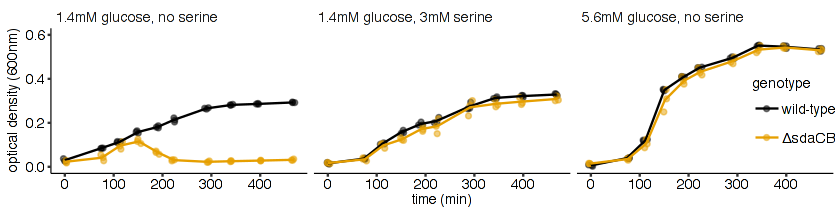

In [27]:
# Plot Fig 2A
plot.width = 7
plot.height = 1.8
options(repr.plot.width=plot.width, repr.plot.height=plot.height)

ggplot(plot_data, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
facet_wrap(~glucose_serine, nrow=1) +
scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("ΔsdaCB")))) +
scale_y_continuous(limits = c(0, 0.6)) +
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05), legend.position = c(0.95, 0.4)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/fig_2a.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

### Figure 2F

In [28]:
data <- read_tsv('../data/plate_reader/2f_data.tsv')
sampleannotations <- read_csv('../data/plate_reader/2f_ann.csv')

processed_data <- data %>%  
  left_join(sampleannotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>%
  mutate(od = od - 0.04) %>%
  group_by(time, genotype, bio_rep) %>%
  summarize(mean_od=mean(od), sem_od = (sd(od) / sqrt(n()))) %>% 
  ungroup()

plot_data <- processed_data %>% 
  mutate(genotype = factor(genotype, levels=c("WT","sdaCB")))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  bio_rep = col_integer(),
  tech_rep = col_integer(),
  plate = col_integer()
)


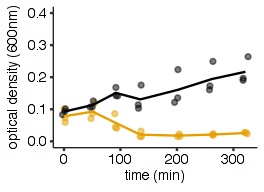

In [29]:
plot.width = 2.2
plot.height = 1.6
options(repr.plot.width=plot.width, repr.plot.height=plot.height)

ggplot(plot_data, aes(x=time, y=mean_od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("sdaCB-")))) +
scale_y_continuous(limits = c(0, 0.4)) +
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05), legend.position = 'none') +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/fig_2f.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

### Supp Figure 2A

In [30]:
data <- read_tsv('../data/plate_reader/supp_data_2a.tsv')
annotations <- read_csv('../data/plate_reader/supp_ann_2a.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>%
  mutate(od = od - 0.04) %>%
  subset(background == 'MG1655') %>%
  mutate(genotype = factor(genotype, levels=c('WT','sdaCB')))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  background = col_character(),
  genotype = col_character(),
  genotype_serA = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


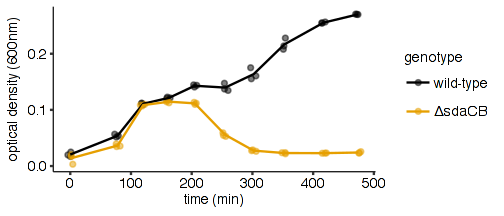

In [31]:
# plot
plot.width = 4.2
plot.height = 1.8
options(repr.plot.width=plot.width, repr.plot.height=plot.height)

ggplot(processed_data, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) +
scale_colour_manual(values=cbPalette, labels=c("wild-type", 
                                               expression(italic("ΔsdaCB")))) +
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/supp_2a.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

### Supp Figure 2B

In [32]:
data_gly <- read_tsv('../data/plate_reader/supp_data_2b_glycerol.tsv')
ann_gly <- read_csv('../data/plate_reader/supp_ann_2b_glycerol.csv')
processed_gly <- data_gly %>%  
  left_join(ann_gly, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>%
  mutate(od = od - 0.04) %>%
  subset(carbon == '.025%_glycerol')

data_pyr <- read_tsv('../data/plate_reader/supp_data_2b_pyruvate.tsv')
ann_pyr <- read_csv('../data/plate_reader/supp_ann_2b_pyruvate.csv')
processed_pyr <- data_pyr %>%  
  left_join(ann_pyr, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>% 
  mutate(od = od - 0.04) %>%
  subset(carbon == '.025%pyr') %>%
  subset(genotype %in% c('WT','sdaCB'))

plot_data <- bind_rows(processed_gly, processed_pyr) %>%
  mutate(carbon = factor(carbon, levels = c('.025%_glycerol',
                                           '.025%pyr'),
                        labels = c('2.8mM glycerol','2.8mM pyruvate')))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  carbon = col_character(),
  serine_mM = col_integer(),
  replicate = col_integer(),
  plate = col_integer()
)
Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  carbon = col_character(),
  serine_mM = col_double(),
  replicate = col_integer(),
  plate = col_integer()
)


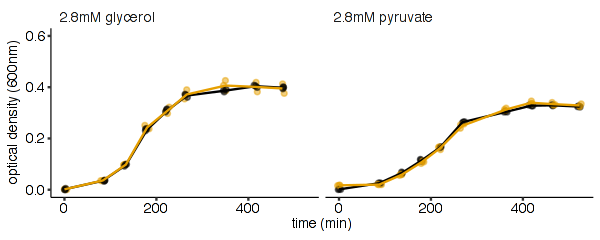

In [33]:
plot.width = 5
plot.height = 2
options(repr.plot.width=plot.width, repr.plot.height=plot.height)

ggplot(plot_data, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
facet_wrap(~carbon) + scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("sdaCB-")))) + 
scale_y_continuous(limits = c(0, 0.6)) +
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05), legend.position = 'none') +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/supp_2b.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)